<a href="https://colab.research.google.com/github/Anjasfedo/scikit-learn/blob/main/calm-notebooks/scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How Scikit learn works

data > model > predicition

data usually saparated into 2:
1. `X` the features
2. `y` the labels

`X` and `y` was scientific notation

Model got 2 phase:
1. create - object
2. learn - `.fit(X, y)

In [4]:
import sklearn

sklearn.__version__

'1.2.2'

## 1. Prepare Dataset

In [6]:
# Load dataset
from sklearn.datasets import load_boston

load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [8]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [12]:
data.shape

(506, 13)

In [15]:
target.shape

(506,)

In [19]:
X, y = data, target

## 2. Build Model

In [24]:
from sklearn.neighbors import KNeighborsRegressor

model_KN = KNeighborsRegressor()

In [25]:
model_KN.fit(X, y)

KNeighborsRegressor()

In [31]:
pred_KN = model_KN.predict(X)

## 3. Another model

In [28]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()

In [29]:
model_linear.fit(X, y)

LinearRegression()

In [32]:
pred_linear = model_linear.predict(X)

## 4. Evaluate

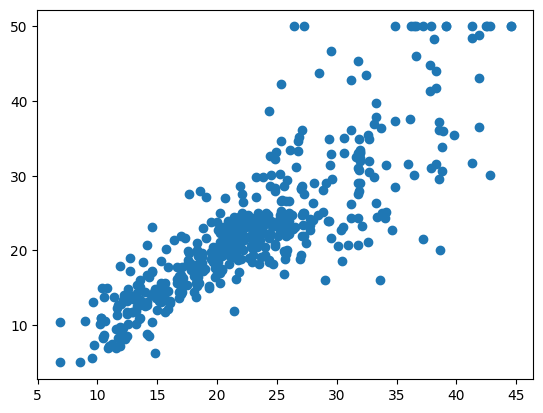

In [38]:
from matplotlib import pyplot as plt

plt.scatter(pred_KN, y)

plt.show()

## 5. Preprocessing

(data X > apply scale + data y) > KNN model > pred

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
pipe_KN = Pipeline([('scaler', scaler), ('knn', model_KN)])

In [49]:
pipe_KN.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

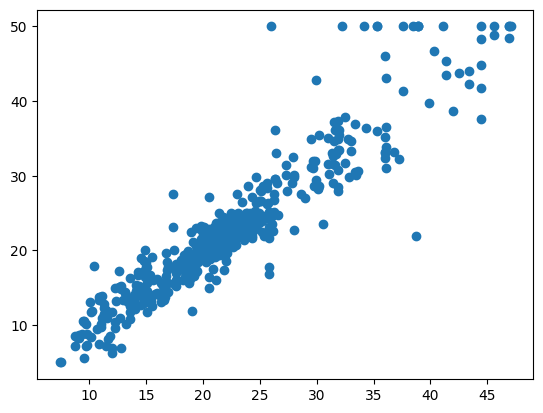

In [50]:
pred_pipe_KN = pipe_KN.predict(X)

plt.scatter(pred_pipe_KN, y)

plt.show()

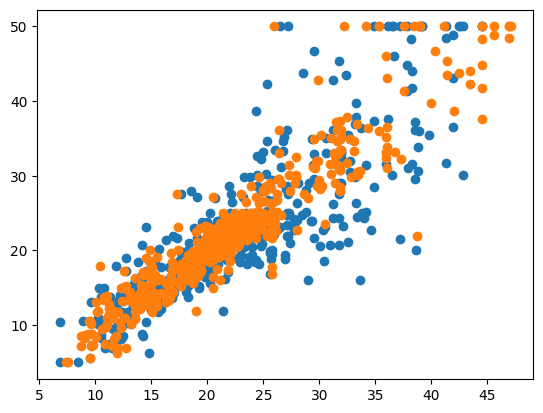

In [53]:
plt.scatter(pred_KN, y)
plt.scatter(pred_pipe_KN, y)

plt.show()

## 6. Tune the model

In [54]:
pipe_KN_tune = Pipeline([('scaler', scaler), ('knn', KNeighborsRegressor(n_neighbors=1))])

In [55]:
pipe_KN_tune.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=1))])

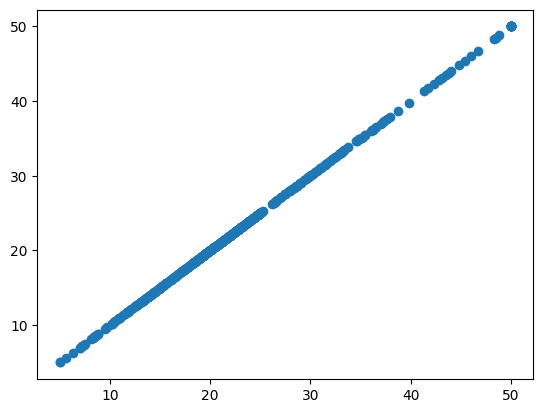

In [56]:
pred_pipe_KN_tune = pipe_KN_tune.predict(X)

plt.scatter(pred_pipe_KN_tune, y)

plt.show()

## 7. GridSearchCV

Tune to change settings of model, to choose best settings we can compare each pred.

By divide data X into 3 section, then copy it to 3 data, that have different predict section

- X1 predict was section 1
- X2 predict was section 2
- X3 predict was section 3

The other part was for training

- X1 - predict, train, train
- X2 - train, predict, train
- X3 - train, train, predict

By do `.fit(train).predict(predict)`, to prevent use data that already used to train.

This are an object called "GridSearchCV"

Perform cross validation

model -> GridSearchCV (because it has `.fit` and `.predict`

In [62]:
from sklearn.model_selection import GridSearchCV

pipe_KN_grid = Pipeline([('scaler', scaler), ('knn', KNeighborsRegressor(n_neighbors=1))])

pipe_KN_grid.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsRegressor(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [64]:
model_KN_grid = GridSearchCV(estimator=pipe_KN_grid,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             cv=3 # cross validation
             )

In [65]:
model_KN_grid.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [67]:
pd.DataFrame(model_KN_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002632,0.001541,0.002755,0.000759,1,{'knn__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001644,0.000118,0.002525,0.000771,2,{'knn__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001854,0.000311,0.002367,0.000279,3,{'knn__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001528,0.000125,0.002197,0.000231,4,{'knn__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001389,0.000027,0.002079,0.000153,5,{'knn__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001395,0.000011,0.002113,0.000177,6,{'knn__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001419,0.000042,0.002339,0.000205,7,{'knn__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001383,0.000008,0.002194,0.000187,8,{'knn__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001354,0.000012,0.002166,0.000144,9,{'knn__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001377,0.000056,0.002326,0.000158,10,{'knn__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


In [69]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1012 non-null   float64
 1   1       1012 non-null   float64
 2   2       1012 non-null   float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
dtypes: float64(11)
memory usage: 87.1 KB


In [71]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [78]:
data_pd = pd.DataFrame(data)
data_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


data > ML > output

understanding dataset

- etichs
- feedback
- fallback